<a href="https://colab.research.google.com/github/DenilsonPaco98/Pandas_lesson/blob/main/Pandas_lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Pandas 3 -- Bem Vindo  ! 

Este é um mini introdutório do pandas em python, estarei mandando mais e mais tutoriais, será disponibilizado o arquivo CSV, utilizado neste notebook e assim poderam se divertir um pouco!

Segue meu github :https://github.com/DenilsonPaco98

Linkedin : https://www.linkedin.com/in/denilson-paco-24b629181/

CSV : https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv


** Recurso retirado diretamentamente da Documentação :


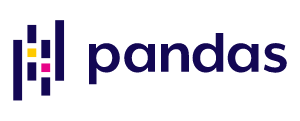

In [56]:
#Nesta lição aprenderemos um pouco de pandas e matplotlib!
#IMPORTAÇÃO
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
#Importanto o arquivo CSV
qualidade_ar = pd.read_csv("air_quality_no2.csv", index_col=0, parse_dates=True)

O uso dos parâmetros **index_col** e **parse_dates** da **read_csv**função para definir a primeira (0ª) coluna como índice do resultado **DataFrame** e converter as datas na coluna em **Timestamp** objetos, respectivamente.

In [58]:
#vamos mostrar o inicio dessa aventura, no metodo head("qtd de exibição")
qualidade_ar.head(8)

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
2019-05-07 07:00:00,NaN,72.4,26.0
2019-05-07 08:00:00,NaN,77.7,32.0
2019-05-07 09:00:00,NaN,67.9,32.0


In [59]:
#ultimas linhas metodo tail()
qualidade_ar.tail(8)

,station_antwerp,station_paris,station_london
datetime,,,
2019-06-20 19:00:00,NaN,23.2,NaN
2019-06-20 20:00:00,NaN,23.9,NaN
2019-06-20 21:00:00,NaN,25.3,NaN
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN
2019-06-21 01:00:00,NaN,21.8,NaN
2019-06-21 02:00:00,NaN,20.0,NaN


<h1>Como criar parcelas em pandas? </h1>


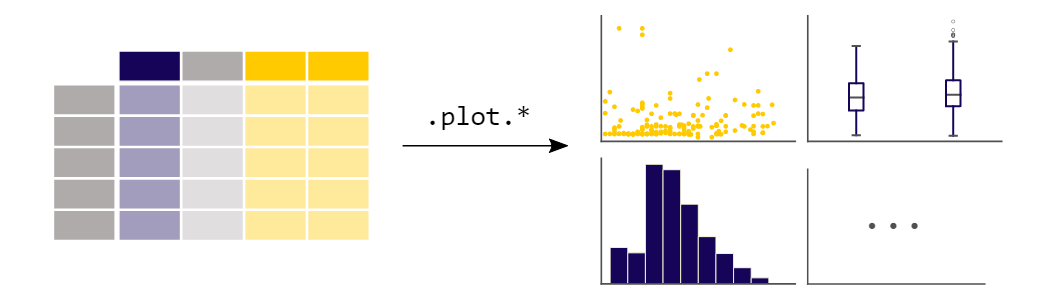

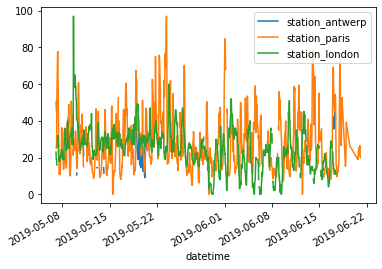

In [10]:
#Quero uma verificação visual rápida dos dados.
qualidade_ar.plot()

Com a **DataFrame**, o pandas cria por padrão um gráfico de linha para cada uma das colunas com dados numéricos.

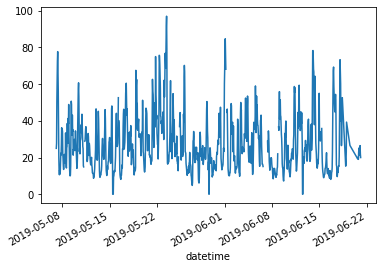

In [11]:
#Quero plotar apenas as colunas da tabela de dados com os dados de Paris.
qualidade_ar["station_paris"].plot()

Para plotar uma coluna específica, use o método de seleção do **tutorial de dados de subconjunto** em combinação com o **plot()** método. Portanto, o **plot()**método funciona em ambos Seriese **DataFrame**.

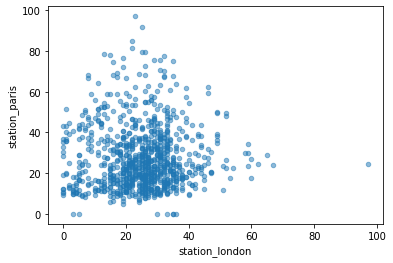

In [24]:
#Eu quero comparar visualmente o N02 valores medidos em Londres versus Paris.
qualidade_ar.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

In [21]:
#Além da line plotagem padrão ao usar a plotfunção, uma série de alternativas estão disponíveis para plotar os dados.
#Vamos usar algum Python padrão para obter uma visão geral dos métodos de plot disponíveis:
[
 method_name
 for method_name in dir(qualidade_ar.plot)
 if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


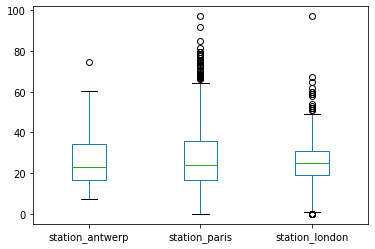

In [22]:
#Uma das opções é DataFrame.plot.box(), que se refere a um boxplot . O box método é aplicável nos dados de exemplo de qualidade do ar:
qualidade_ar.plot.box()

Para obter uma introdução a plotagens diferentes da plotagem de linha padrão, consulte a seção do guia do usuário sobre : https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-other

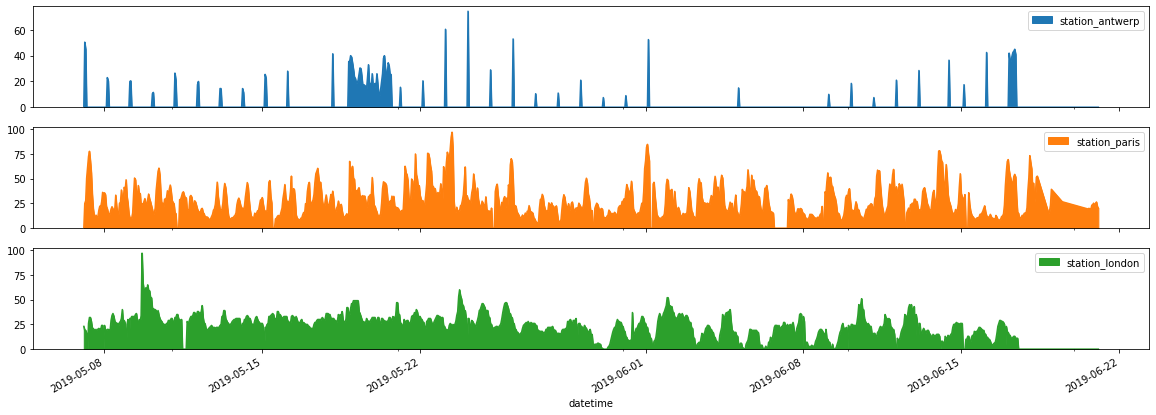

In [33]:
#Eu quero cada uma das colunas em uma subtrama separada.
axs =qualidade_ar.plot.area(figsize=(20,7), subplots=True)

Subplots separados para cada uma das colunas de dados são suportados pelo **subplots** argumento das **plot** funções. As opções embutidas disponíveis em cada uma das funções de plotagem de pandas valem a pena revisar.

Text(0, 0.5, 'N0$_2$ concentration')

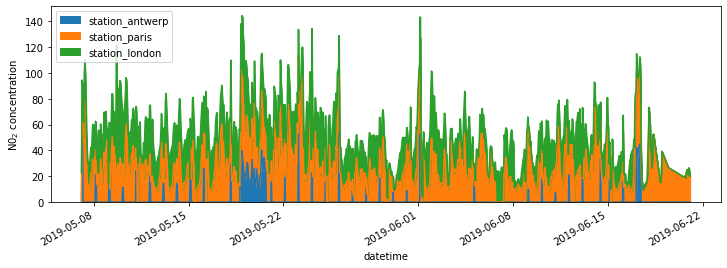

In [38]:
#Eu quero personalizar ainda mais, estender ou salvar o enredo resultante.
# atribuimos a 'fig' como uma variavel e colocamos nela um tamanho e plotagem resultante no caso figsize=12,4
fig, axs = plt.subplots(figsize=(12,4))
#indicamos ao no df que o 'ax' será igual ao 'axs'
qualidade_ar.plot.area(ax=axs)
#axs no entanto é indicado para colocar no ylabel que é o titulo no ("N0$_2$ concentration")
axs.set_ylabel("N0$_2$ concentration")
#aquela atribuição concedida ao fig é usada mais com o a função savefig para que se haja um arquivo para salvar com ele o nome do arquivo junto com o formato
fig.savefig("no2_concentrations.png")

In [ ]:
# Create an empty matplotlib Figure and Axes
# Use pandas to put the area plot on the prepared Figure/Axes
# Do any matplotlib customization you like
# Save the Figure/Axes using the existing matplotlib method.

**LEMBRAR**

Os **.plot.*** métodos são aplicáveis ​​em Series e DataFrames

Por padrão, cada uma das colunas é plotada como um elemento diferente (linha, boxplot, ...)

Qualquer plotagem criada por pandas é um objeto Matplotlib.

<h1>Como criar novas colunas derivadas de colunas existentes?</h1>

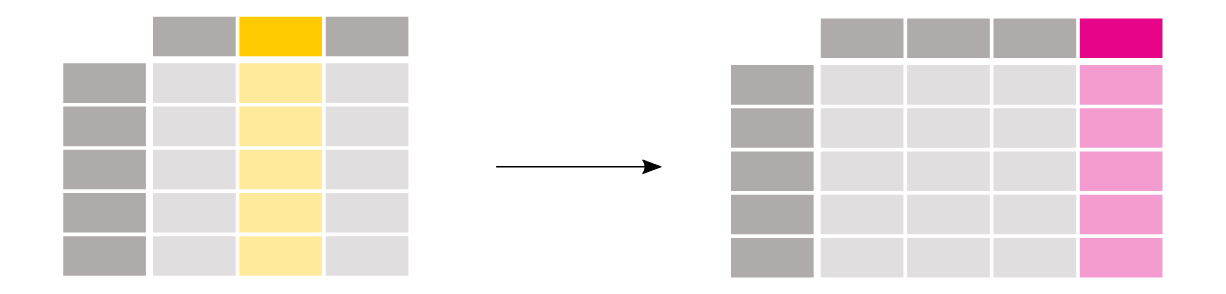

In [40]:
#Eu quero expressar o NO2 concentração da estação em Londres em mg / m3
#Se assumirmos a temperatura de 25 graus celsius e pressão de 1013 hPa, o fator de conversão é 1,882
qualidade_ar["london_mg_per_cubic"] = qualidade_ar["station_london"]*1.882
qualidade_ar.head(8)

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN
2019-05-07 07:00:00,NaN,72.4,26.0,48.932
2019-05-07 08:00:00,NaN,77.7,32.0,60.224
2019-05-07 09:00:00,NaN,67.9,32.0,60.224


Para criar uma nova coluna, use os [ ]colchetes com o nome da nova coluna no lado esquerdo da atribuição.

**OBSERVÇÃO**

O cálculo dos valores é feito **element_wise** . Isso significa que todos os valores na coluna fornecida são multiplicados pelo valor 1,882 de uma vez. Você não precisa usar um loop para iterar cada uma das linhas!

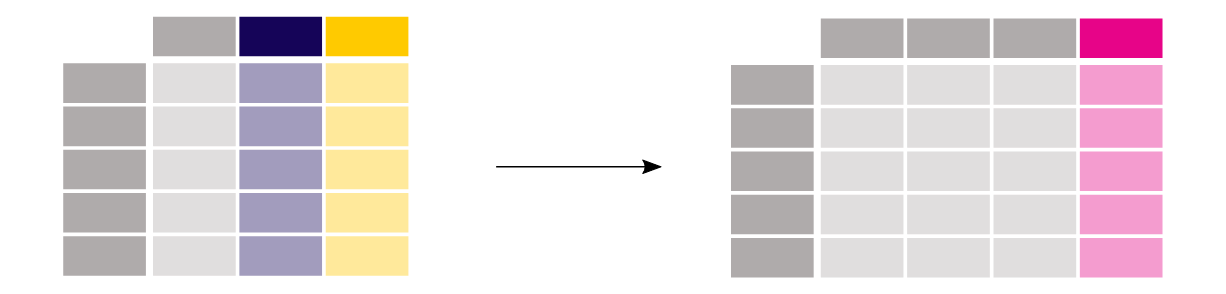

In [41]:
#Quero verificar a proporção dos valores em Paris versus Antuérpia e salvar o resultado em uma nova coluna
#vamos criar uma coluna com a proporção de valores de paris e qntweerp com o nome "ratio_paris_antwerp"
qualidade_ar["ratio_paris_antwerp"] = (qualidade_ar["station_paris"] / qualidade_ar["station_antwerp"])
qualidade_ar.head(10)

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
2019-05-07 07:00:00,NaN,72.4,26.0,48.932,NaN
2019-05-07 08:00:00,NaN,77.7,32.0,60.224,NaN
2019-05-07 09:00:00,NaN,67.9,32.0,60.224,NaN
2019-05-07 10:00:00,NaN,56.0,28.0,52.696,NaN


Quero renomear as colunas de dados para os identificadores de estação correspondentes usados ​​pelo openAQ

In [50]:
#atribuimos um novo nome para a mudança e damos o vamos na qual vamos mudar e colocamos o metodo "rename()"
#("atribuimos o valor ":" chave a ser mudados")
qualidade_ar_novoname = qualidade_ar.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "DENILSON PACO"    }
)

In [51]:
#Aqui temos nossa mudança com o meu nome no lugar de 'station_london' rssrs
qualidade_ar_novoname.head(8)

,BETR801,FR04014,DENILSON PACO,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
2019-05-07 07:00:00,NaN,72.4,26.0,48.932,NaN
2019-05-07 08:00:00,NaN,77.7,32.0,60.224,NaN
2019-05-07 09:00:00,NaN,67.9,32.0,60.224,NaN


O mapeamento não deve ser restrito apenas a nomes fixos, mas também pode ser uma função de mapeamento. Por exemplo, converter os nomes das colunas em letras minúsculas também pode ser feito usando uma função:

In [53]:
#Conversão de metras minusculas para Maisculas
#lembre se sempre do metodo rename()
qualidade_ar_novoname = qualidade_ar_novoname.rename(columns=str.lower)

In [54]:
qualidade_ar_novoname.head(10)

,betr801,fr04014,denilson paco,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
2019-05-07 07:00:00,NaN,72.4,26.0,48.932,NaN
2019-05-07 08:00:00,NaN,77.7,32.0,60.224,NaN
2019-05-07 09:00:00,NaN,67.9,32.0,60.224,NaN
2019-05-07 10:00:00,NaN,56.0,28.0,52.696,NaN


In [55]:
qualidade_ar.head(8)

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
2019-05-07 07:00:00,NaN,72.4,26.0,48.932,NaN
2019-05-07 08:00:00,NaN,77.7,32.0,60.224,NaN
2019-05-07 09:00:00,NaN,67.9,32.0,60.224,NaN


<h1>Como podemos ver mantemos o CSV original acima ! 

<h1>Obrigado por chegar até aqui ! :)</h1>